In [1]:
import pandas as pd

import matplotlib.pyplot as plt

# the dataset for the demo
from sklearn.datasets import load_boston

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import PolynomialFeatures

In [2]:
# load the the Boston House price data from Scikit-learn
boston_dataset = load_boston()

# create a dataframe with the independent variables
data = pd.DataFrame(boston_dataset.data,
                    columns=boston_dataset.feature_names)

# add the target
data['MEDV'] = boston_dataset.target

data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [3]:
# let's separate into training and testing set

X_train, X_test, y_train, y_test = train_test_split(
    data.drop('MEDV', axis=1), data['MEDV'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((354, 13), (152, 13))

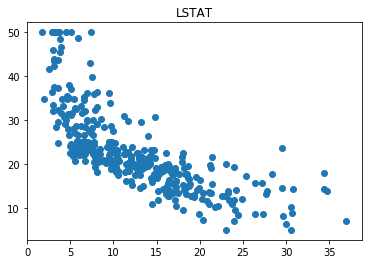

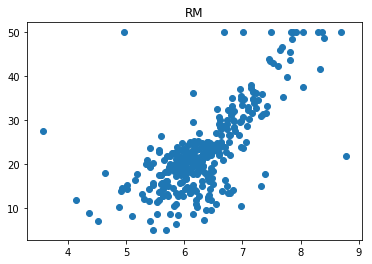

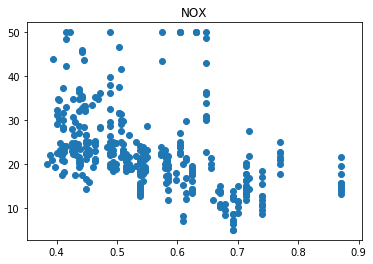

In [4]:
# plot relation of features of interest with the target

for f in ['LSTAT', 'RM', 'NOX']:
    plt.scatter(X_train[f], y_train)
    plt.title(f)
    plt.show()

In [5]:
# set up the polynomial expansion transformer

poly = PolynomialFeatures(degree=3, interaction_only=False, include_bias=False)

In [6]:
# train the polynomial expansion transformer

poly.fit(X_train[['LSTAT', 'RM', 'NOX']])

PolynomialFeatures(degree=3, include_bias=False, interaction_only=False,
                   order='C')

In [7]:
# create the new features

train_t = poly.transform(X_train[['LSTAT', 'RM', 'NOX']])
test_t = poly.transform(X_test[['LSTAT', 'RM', 'NOX']])

In [8]:
# visualise the name of the created features

poly.get_feature_names(['LSTAT', 'RM', 'NOX'])

['LSTAT',
 'RM',
 'NOX',
 'LSTAT^2',
 'LSTAT RM',
 'LSTAT NOX',
 'RM^2',
 'RM NOX',
 'NOX^2',
 'LSTAT^3',
 'LSTAT^2 RM',
 'LSTAT^2 NOX',
 'LSTAT RM^2',
 'LSTAT RM NOX',
 'LSTAT NOX^2',
 'RM^3',
 'RM^2 NOX',
 'RM NOX^2',
 'NOX^3']

In [9]:
len(poly.get_feature_names(['LSTAT', 'RM', 'NOX']))

19

In [10]:
# capture the returned features in a dataframe
test_t = pd.DataFrame(test_t)

# add column names of created features
test_t.columns = poly.get_feature_names(['LSTAT', 'RM', 'NOX'])


test_t.head()

,LSTAT,RM,NOX,LSTAT^2,LSTAT RM,LSTAT NOX,RM^2,RM NOX,NOX^2,LSTAT^3,LSTAT^2 RM,LSTAT^2 NOX,LSTAT RM^2,LSTAT RM NOX,LSTAT NOX^2,RM^3,RM^2 NOX,RM NOX^2,NOX^3
0,7.34,6.333,0.460,53.8756,46.48422,3.37640,40.106889,2.913180,0.211600,395.446904,341.194175,24.782776,294.384565,21.382741,1.553144,253.996928,18.449169,1.340063,0.097336
1,9.53,6.216,0.631,90.8209,59.23848,6.01343,38.638656,3.922296,0.398161,865.523177,564.542714,57.307988,368.226392,37.379481,3.794474,240.177886,24.380992,2.474969,0.251240
2,10.50,6.373,0.550,110.2500,66.91650,5.77500,40.615129,3.505150,0.302500,1157.625000,702.623250,60.637500,426.458855,36.804075,3.176250,258.840217,22.338321,1.927833,0.166375
3,19.77,5.349,0.693,390.8529,105.74973,13.70061,28.611801,3.706857,0.480249,7727.161833,2090.672162,270.861060,565.655306,73.284563,9.494523,153.044524,19.827978,2.568852,0.332813
4,12.34,6.232,0.437,152.2756,76.90288,5.39258,38.837824,2.723384,0.190969,1879.080904,948.981539,66.544437,479.258748,33.606559,2.356557,242.037319,16.972129,1.190119,0.083453


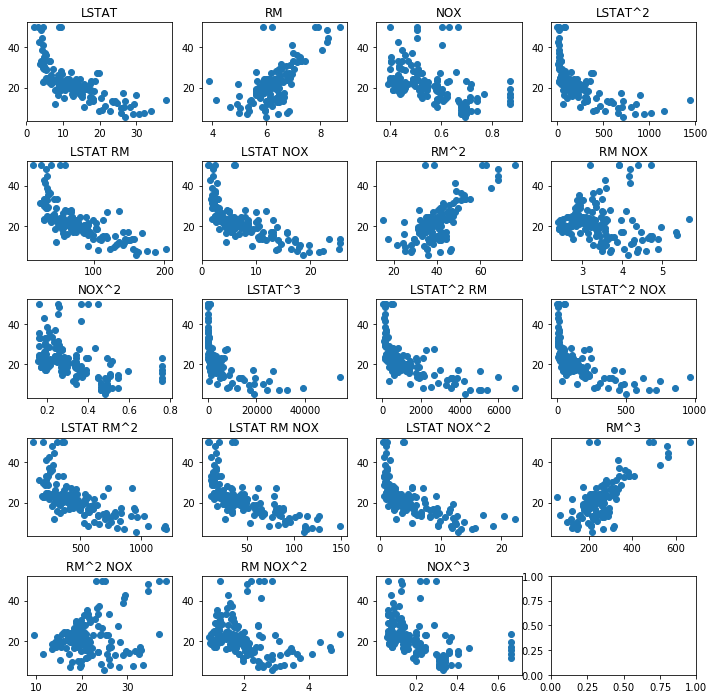

In [11]:
# plot the new features vs the target

# https://stackoverflow.com/questions/6541123/improve-subplot-size-spacing-with-many-subplots-in-matplotlib

def plot_features(df):

    # function plots 9 images
    nb_rows = 5
    nb_cols = 4
    
    fig, axs = plt.subplots(nb_rows, nb_cols, figsize=(12, 12))
    plt.subplots_adjust(wspace=None, hspace=0.4)

    n = 0
    for i in range(0, nb_rows):
        for j in range(0, nb_cols):
            if n!=19:
                axs[i, j].scatter(test_t[test_t.columns[n]], y_test)
                axs[i, j].set_title(test_t.columns[n])
                n += 1
    plt.show()
    
plot_features(test_t)